<div style="text-align:center">
<img src="img/nlopt.gif" width="600">
</div>





## Introduction
Comin' soon

## Summary
1. <b> Tackle non-linear optimizations </b>
    - 1.1 How to detect a non-linear problem
    - 1.2 Local or global solution, convex problem or not, Sinusoïdal or not ?
    - 1.3 What solver to use, Scipy, Pyomo simple model, NlOpt, Gekko , Ipopt, Lingo ?
- Each N.L solvers simple codes discovery.
2. <b> Modeling of a non linear production mixe optimization</b>
    - 2.1 Instance
    - 2.2 Plotting costs
    - 2.3 Mathematical modeling
    - 2.4 Gekko solution
    - 2.5 Cplex solution
3. <b> Modeling of a non linear location allocation model</b>
    - Presentation of the Beer Belge Ronald Rardin " Optimizations in O.R" 2nd edition
    - Mathematical modeling
    - Gekko and Pyomo simple model solution
4. <b> Modeling of a non linear Oilco NLP Haverly 1978</b>
    - Presentation of the Unknown book pb
    - Mathematical modeling
    - Gekko and Pyomo simple model solution
5. <b>Modeling of an optimal dimensions of a soda can </b>
    - Presentation of the problem in a table
    - Mathematical modeling
    - Gekko and Pyomo simple model solution
6. <b> Modeling of a non linear Portfolio optimization</b>
    - Presentation of the problem in a table
    - Mathematical modeling
    - Gekko and Pyomo simple model solution

# 2.Modeling of a non linear Production mixe optimization

<b>2.1 Instance</b>

I have one machine that produces 3 parts. The machine can produce a maximum of 1,000 products in the allotted time.
The selling price of parts A, B, and C decreases with the quantity produced.
- The selling price of part A is 81-qA/20 (The price decreases if a large quantity is produced)
- The selling price of part B is 90-qB/20 (The price decreases if a large quantity is produced)
- The selling price of part C is 85-qC/20 (The price decreases if a large quantity is produced)

Which parts should I sell to maximize profit while taking into account my non-linear price reduction?

<b>2.2 Plotting costs</b>

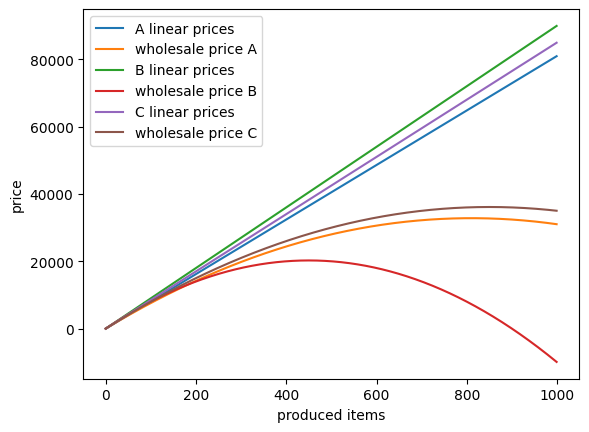

In [ ]:
# -----------------------------------
# Import lib
# -----------------------------------
import matplotlib.pyplot as plt

# -----------------------------------
# Define range
# -----------------------------------
x_cords = range(0,1000)

# -----------------------------------
# functions
# -----------------------------------
linear_prices_A = [x * 81 for x in x_cords] 
non_linear_pricing_A = [x * ( 81 - x / 20) for x in x_cords] 

linear_prices_B = [x * 90 for x in x_cords] 
non_linear_pricing_B = [x * ( 90 - x / 20) for x in x_cords] 

linear_prices_C = [x * 85 for x in x_cords] 
non_linear_pricing_C = [x * ( 85 - x / 20) for x in x_cords] 

# -----------------------------------
# Plotting
# -----------------------------------
plt.plot(x_cords,linear_prices_A, label="A linear prices")
plt.plot(x_cords,non_linear_pricing_A, label="wholesale price A")

plt.plot(x_cords,linear_prices_B, label="B linear prices")
plt.plot(x_cords,non_linear_pricing_B, label="wholesale price B")

plt.plot(x_cords,linear_prices_C, label="C linear prices")
plt.plot(x_cords,non_linear_pricing_C, label="wholesale price C")

plt.xlabel("produced items")
plt.ylabel("price")
plt.legend(loc="upper left")
plt.show()

<b>2.3 Math model</b><br>
Comin soon

<b>2.4 Gekko solution</b><br>

In [5]:
# -----------------------------------
# Import lib
# -----------------------------------
from gekko import GEKKO

# -----------------------------------
# Model
# -----------------------------------
m = GEKKO(remote=False) 

#The example problem that you referenced uses the default IPOPT solver. To get a binary or integer solution, switch to the APOPT solver.
m.options.SOLVER = 1

# -----------------------------------
# Decision variables
# -----------------------------------
A = m.Var(value=1,lb=0,ub=10000,integer=True)
B = m.Var(value=1,lb=0,ub=10000,integer=True)
C = m.Var(value=1,lb=0,ub=10000,integer=True)

# -----------------------------------
# Math model
# -----------------------------------
# Objective
m.Maximize( A * (81 - ( A / 20  )) + B * (90 - (B / 20)) + C * (85 - (C / 20)))

# Constraint
m.Equation( A + B + C <= 1000) 

# -----------------------------------
# Solution
# -----------------------------------
 
m.options.IMODE = 3 # Steady state optimization

m.solve(disp=False) # Solve

print('Solution')

print('A: ' + str(A.value))
print('B: ' + str(B.value))
print('C: ' + str(C.value))

print('Objectif: ' + str(-m.options.objfcnval))

Solution
A: [290.0]
B: [380.0]
C: [330.0]
Objectif: 68870.0


<b>2.5 Cplex solution</b><br>

In [6]:
# -----------------------------------
# Import lib
# -----------------------------------
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# -----------------------------------
# Type of problem
# -----------------------------------
model = Model(name='maximisation_de_profit_non_lineaire', log_output=True)

# -----------------------------------
# Decisions variables
# -----------------------------------
A = model.integer_var(name='A')
B = model.integer_var(name='B')
C = model.integer_var(name='C')

# -----------------------------------
# Math model
# -----------------------------------
# Objective
model.maximize(A * (81 - ( A / 20  )) + B * (90 - (B / 20)) + C * (85 - (C / 20))) 

# Constraints
model.add_constraint(A + B + C <= 1000)

# -----------------------------------
# Solution
# -----------------------------------
model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 68870.000
status: OPTIMAL_SOLUTION(2)
  A=290
  B=380
  C=330
